<a href="https://colab.research.google.com/github/leandrolrs18/Detec-oChoroBebe/blob/main/BabyCry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Adicionando as Bibliotecas

In [ ]:
!pip install soundfile
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import soundfile as sf
from sklearn import preprocessing


#Extraindo as pastas: crying baby, silence, noise e baby laugh


In [ ]:
!unzip crying.zip 

Archive:  crying.zip
  inflating: crying/V_2017-04-01+08_06_22=0_30.mp3_16.wav  
  inflating: crying/V_2017-04-01+08_06_22=0_30.mp3_12.wav  
  inflating: crying/V_2017-04-01+08_06_22=0_30.mp3_23.wav  
  inflating: crying/V_2017-04-01+08_06_22=0_30.mp3_14.wav  
  inflating: crying/V_2017-04-01+08_06_22=0_30.mp3_9.wav  
  inflating: crying/V_2017-04-01+08_06_22=0_30.mp3_18.wav  
  inflating: crying/V_2017-04-01+08_06_22=0_30.mp3_2.wav  
  inflating: crying/V_2017-04-01+08_06_22=0_30.mp3_22.wav  
  inflating: crying/V_2017-04-01+08_06_22=0_30.mp3_8.wav  
  inflating: crying/V_2017-04-01+08_06_22=0_30.mp3_24.wav  
  inflating: crying/V_2017-04-01+08_06_22=0_30.mp3_1.wav  
  inflating: crying/V_2017-04-01+08_06_22=0_30.mp3_4.wav  
  inflating: crying/V_2017-04-01+08_06_22=0_30.mp3_7.wav  
  inflating: crying/V_2017-04-01+08_06_22=0_30.mp3_25.wav  
  inflating: crying/V_2017-04-01+08_06_22=0_30.mp3_5.wav  
  inflating: crying/V_2017-04-01+08_06_22=0_30.mp3_6.wav  
  inflating: crying/V_2017-

In [ ]:
!unzip silence.zip

Archive:  silence.zip
  inflating: silence/silence.wav_94.wav  
  inflating: silence/silence.wav_95.wav  
  inflating: silence/silence.wav_92.wav  
  inflating: silence/silence.wav_99.wav  
  inflating: silence/silence.wav_90.wav  
  inflating: silence/silence.wav_93.wav  
  inflating: silence/silence.wav_77.wav  
  inflating: silence/silence.wav_89.wav  
  inflating: silence/silence.wav_87.wav  
  inflating: silence/silence.wav_98.wav  
  inflating: silence/silence.wav_86.wav  
  inflating: silence/silence.wav_96.wav  
  inflating: silence/silence.wav_83.wav  
  inflating: silence/silence.wav_84.wav  
  inflating: silence/silence.wav_85.wav  
  inflating: silence/silence.wav_82.wav  
  inflating: silence/silence.wav_91.wav  
  inflating: silence/silence.wav_9.wav  
  inflating: silence/silence.wav_88.wav  
  inflating: silence/silence.wav_97.wav  
  inflating: silence/silence.wav_8.wav  
  inflating: silence/silence.wav_80.wav  
  inflating: silence/silence.wav_78.wav  
  inflating: s

In [ ]:
!unzip laugh.zip

Archive:  laugh.zip
  inflating: 903 - Baby laugh/laugh_2.m4a_18.wav  
  inflating: 903 - Baby laugh/laugh_1.m4a_53.wav  
  inflating: 903 - Baby laugh/laugh_2.m4a_3.wav  
  inflating: 903 - Baby laugh/laugh_1.m4a_50.wav  
  inflating: 903 - Baby laugh/laugh_2.m4a_4.wav  
  inflating: 903 - Baby laugh/laugh_2.m4a_19.wav  
  inflating: 903 - Baby laugh/laugh_1.m4a_5.wav  
  inflating: 903 - Baby laugh/laugh_2.m4a_2.wav  
  inflating: 903 - Baby laugh/laugh_1.m4a_85.wav  
  inflating: 903 - Baby laugh/laugh_2.m4a_14.wav  
  inflating: 903 - Baby laugh/laugh_2.m4a_7.wav  
  inflating: 903 - Baby laugh/laugh_2.m4a_8.wav  
  inflating: 903 - Baby laugh/laugh_2.m4a_17.wav  
  inflating: 903 - Baby laugh/laugh_2.m4a_12.wav  
  inflating: 903 - Baby laugh/laugh_2.m4a_13.wav  
  inflating: 903 - Baby laugh/laugh_1.m4a_51.wav  
  inflating: 903 - Baby laugh/laugh_1.m4a_54.wav  
  inflating: 903 - Baby laugh/laugh_2.m4a_5.wav  
  inflating: 903 - Baby laugh/laugh_2.m4a_15.wav  
  inflating: 903 -

In [ ]:
!unzip noise.zip

Archive:  noise.zip
  inflating: 902 - Noise/4-204119-A.ogg  
  inflating: 902 - Noise/4-223125-A.ogg  
  inflating: 902 - Noise/5-257839-A.ogg  
  inflating: 902 - Noise/4-204121-A.ogg  
  inflating: 902 - Noise/4-187769-B.ogg  
  inflating: 902 - Noise/5-242490-A.ogg  
  inflating: 902 - Noise/4-184235-A.ogg  
  inflating: 902 - Noise/5-243459-A.ogg  
  inflating: 902 - Noise/4-223127-A.ogg  
  inflating: 902 - Noise/4-216211-A.ogg  
  inflating: 902 - Noise/4-204123-A.ogg  
  inflating: 902 - Noise/5-156999-E.ogg  
  inflating: 902 - Noise/4-204115-A.ogg  
  inflating: 902 - Noise/5-195557-A.ogg  
  inflating: 902 - Noise/5-188495-A.ogg  
  inflating: 902 - Noise/5-242491-A.ogg  
  inflating: 902 - Noise/5-192191-A.ogg  
  inflating: 902 - Noise/5-243448-A.ogg  
  inflating: 902 - Noise/5-156999-C.ogg  
  inflating: 902 - Noise/5-156999-D.ogg  
  inflating: 902 - Noise/3-51731-B.ogg  
  inflating: 902 - Noise/5-243450-A.ogg  
  inflating: 902 - Noise/5-156999-B.ogg  
  inflating: 90

REALIZANDO TESTES ANTES DE COMEÇAR REALMENTE O CÓDIGO

In [ ]:
teste = "silence/silence.wav_80.wav"

In [ ]:
a = teste.split("/")

In [ ]:
a

['silence', 'silence.wav_80.wav']

<function matplotlib.pyplot.show>

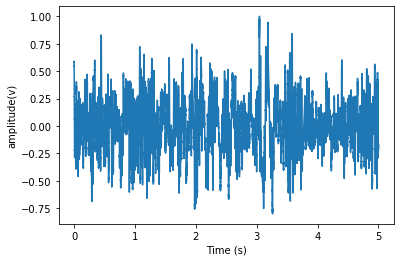

In [ ]:
signal, samplerate = sf.read('silence/silence.wav_105.wav') 

time = np.arange(0,len(signal)*1/samplerate, 1/samplerate)

plt.plot(time, signal)
plt.xlabel('Time (s)')
plt.ylabel('amplitude(v)')
plt.show

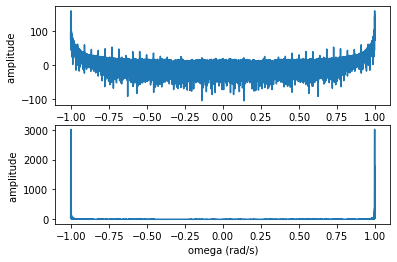

In [ ]:

w = np.linspace(-1,1,samplerate)
ft = np.fft.fft(signal,len(w))
wd = w/samplerate

plt.subplot(2,1,1)
plt.plot(w, 20*np.log(abs(ft)))
plt.xlabel('omega (rad/s)')
plt.ylabel('amplitude ')


plt.subplot(2,1,2)
plt.plot(w, abs(ft))
plt.xlabel('omega (rad/s)')
plt.ylabel('amplitude ')
plt.show()

<function matplotlib.pyplot.show>

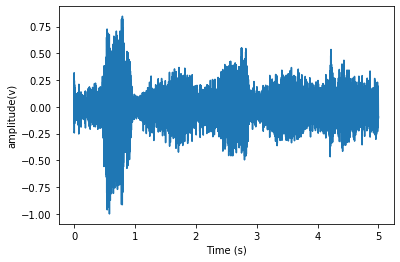

In [ ]:
signal2, fa = sf.read('crying/margot.m4a_24.wav')
time2 = np.arange(0,len(signal2)*1/fa, 1/fa)

plt.plot(time2, signal2)
plt.xlabel('Time (s)')
plt.ylabel('amplitude(v)')
plt.show

In [ ]:
E = sum(abs(signal2)**2.0)/fa
print (E)

0.08278343117411517


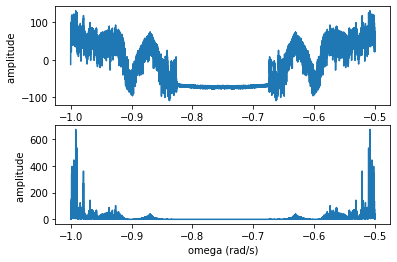

In [ ]:
w2 = np.linspace(-1,1,samplerate)
ft2 = np.fft.fft(signal2,len(w2))
wd2 = w2/samplerate
plt.subplot(2,1,1)
plt.plot(w2, 20*np.log(abs(ft2)))
plt.xlabel('omega (rad/s)')
plt.ylabel('amplitude ')

plt.subplot(2,1,2)
plt.plot(w2, abs(ft2))
plt.xlabel('omega (rad/s)')
plt.ylabel('amplitude ')
plt.show()




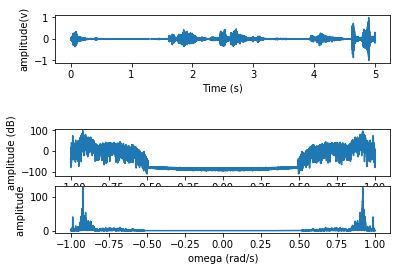

In [ ]:
signal3, samplerate3 = sf.read('data/903 - Baby laugh/laugh_2.m4a_5.wav') 
time3 = np.arange(0,len(signal3)*1/samplerate3, 1/samplerate3)

w3 = np.linspace(-1,1,samplerate3)
ft3 = np.fft.fft(signal3,len(w3))

plt.subplot(4,1,1)
plt.plot(time3, signal3)
plt.xlabel('Time (s)')
plt.ylabel('amplitude(v)')

plt.subplot(4,1,3)
plt.plot(w3, 20*np.log(abs(ft3)))
plt.xlabel('omega (rad/s)')
plt.ylabel('amplitude (dB)')

plt.subplot(4,1,4)
plt.plot(w3, abs(ft3))
plt.xlabel('omega (rad/s)')
plt.ylabel('amplitude ')
plt.show()

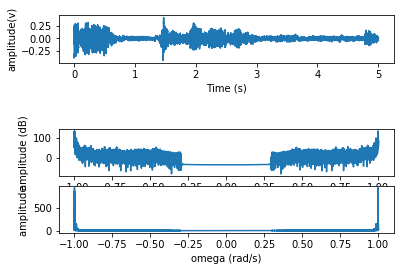

In [ ]:
signal4, samplerate4 = sf.read('data/902 - Noise/3-130998-A.ogg') 
time4 = np.arange(0,len(signal4)*1/samplerate4, 1/samplerate4)

w4 = np.linspace(-1,1,samplerate4)
ft4 = np.fft.fft(signal4,len(w4))

plt.subplot(4,1,1)
plt.plot(time4, signal4)
plt.xlabel('Time (s)')
plt.ylabel('amplitude(v)')

plt.subplot(4,1,3)
plt.plot(w4, 20*np.log(abs(ft4)))
plt.xlabel('omega (rad/s)')
plt.ylabel('amplitude (dB)')

plt.subplot(4,1,4)
plt.plot(w4, abs(ft4))
plt.xlabel('omega (rad/s)')
plt.ylabel('amplitude ')
plt.show()

In [ ]:
print(len(w2))

44100


Criar vetor de audio(caracteristicas=entrada) e labels(saída)

In [ ]:
audios = []
labels = []

def traverse_dir(path):
    for file_or_dir in os.listdir(path):
        abs_path = os.path.abspath(os.path.join(path, file_or_dir))
        print(abs_path)
        if os.path.isdir(abs_path):  # dir
            traverse_dir(abs_path)
        else:                        # file
            if file_or_dir.endswith('.wav'):
                audio, fs= read_audio(abs_path)
                audios.append(audio)
                lbl = abs_path.split('/')
                labels.append(lbl[3])

    return audios, labels

def read_audio(file_path):
    audio, fs = sf.read(file_path)
    ft = np.fft.fft(audio)
    espct = abs(ft)
    return espct, fs

def extract_data(file_path):
    audios, labels = traverse_dir(file_path)
    audios = np.array(audios)

    return audios, labels

audios, labels = extract_data('data')
labels = np.reshape(labels, [-1])
le = preprocessing.LabelEncoder()
le.fit(labels)
labels_enc = le.transform(labels)



/content/data/crying
/content/data/crying/Louise_01.m4a_4.wav
/content/data/crying/margot.m4a_18.wav
/content/data/crying/Louise_01.m4a_1.wav
/content/data/crying/Louise_01.m4a_10.wav
/content/data/crying/margot.m4a_7.wav
/content/data/crying/margot.m4a_22.wav
/content/data/crying/margot.m4a_17.wav
/content/data/crying/1-22694-B.ogg
/content/data/crying/Louise_01.m4a_13.wav
/content/data/crying/3-152007-E.ogg
/content/data/crying/margot.m4a_2.wav
/content/data/crying/V_2017-04-01+08_06_22=0_30.mp3_22.wav
/content/data/crying/5-151085-A.ogg
/content/data/crying/V_2017-04-01+08_06_22=0_30.mp3_17.wav
/content/data/crying/margot.m4a_11.wav
/content/data/crying/margot.m4a_13.wav
/content/data/crying/1-187207-A.ogg
/content/data/crying/3-152007-B.ogg
/content/data/crying/4-185575-B.ogg
/content/data/crying/2-151079-A.ogg
/content/data/crying/margot.m4a_0.wav
/content/data/crying/margot.m4a_1.wav
/content/data/crying/1-60997-B.ogg
/content/data/crying/4-167077-C.ogg
/content/data/crying/5-198

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(audios, labels_enc, test_size = 0.25, random_state = 0)


NameError: ignored

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense( activation = 'relu', input_dim = 220500, units = 4, kernel_initializer = 'uniform'))

# Adding the second hidden layer
classifier.add(Dense( activation = 'relu', units = 8, kernel_initializer = 'uniform' ))


# Adding the output layer
classifier.add(Dense( activation = 'sigmoid', units = 2, kernel_initializer = 'uniform'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 8, epochs = 50)


NameError: ignored

In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred[0:10])

y_pred = (y_pred > 0.5)
print(y_pred[0:10])

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

[[1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.7583370e-06]
 [4.1723251e-07]
 [1.0000000e+00]
 [1.5348196e-05]
 [2.1755695e-06]
 [2.3841858e-07]
 [9.9999905e-01]]
[[ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]]


In [ ]:
print("Matriz de Confusão:")
print(cm)
print("Taxa de acerto:")
print((cm[0,0]+cm[1,1])/len(y_test) )
print(len(y_test))


Matriz de Confusão:
[[26  0  0]
 [ 0 15  0]
 [ 0 32  0]]
Taxa de acerto:
0.5616438356164384
73
